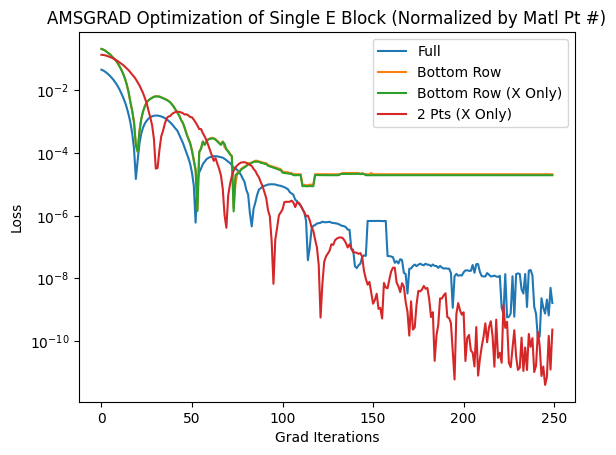

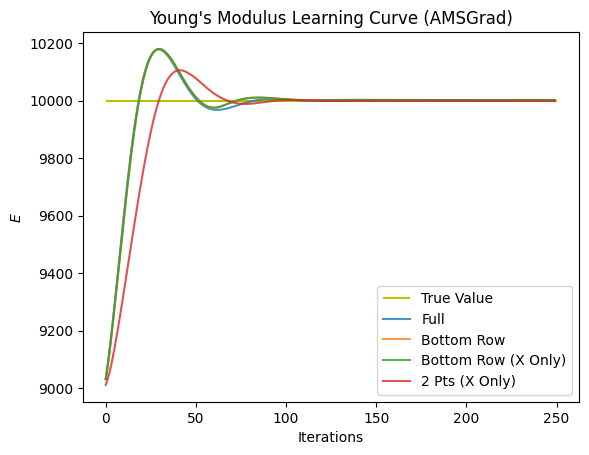

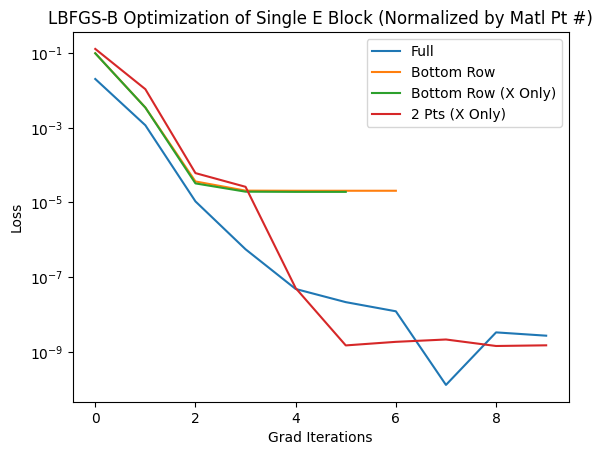

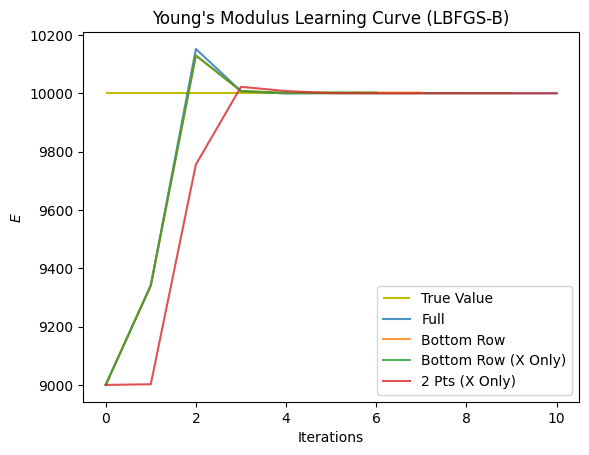

In [3]:
import matplotlib.pyplot as plt
import json
import numpy as np

with open('result_full_grad.json') as json_file:
    result_full_grad = json.load(json_file)
with open('result_bot_grad.json') as json_file:
    result_bot_grad = json.load(json_file)
with open('result_bot_y_grad.json') as json_file:
    result_bot_y_grad = json.load(json_file)
with open('result_half_y_grad.json') as json_file:
    result_half_y_grad = json.load(json_file)
with open('result_bot_x_grad.json') as json_file:
    result_bot_x_grad = json.load(json_file)
with open('result_half_x_grad.json') as json_file:
    result_half_x_grad = json.load(json_file)
with open('result_2_x_grad.json') as json_file:
    result_2_x_grad = json.load(json_file)

with open('result_full_lbfgs.json') as json_file:
    result_full_lbfgs = json.load(json_file)
with open('result_bot_lbfgs.json') as json_file:
    result_bot_lbfgs = json.load(json_file)
with open('result_bot_y_lbfgs.json') as json_file:
    result_bot_y_lbfgs = json.load(json_file)
with open('result_half_y_lbfgs.json') as json_file:
    result_half_y_lbfgs = json.load(json_file)
with open('result_bot_x_lbfgs.json') as json_file:
    result_bot_x_lbfgs = json.load(json_file)
with open('result_half_x_lbfgs.json') as json_file:
    result_half_x_lbfgs = json.load(json_file)
with open('result_2_x_lbfgs.json') as json_file:
    result_2_x_lbfgs = json.load(json_file)

plt.title("AMSGRAD Optimization of Single E Block (Normalized by Matl Pt #)")
plt.ylabel("Loss")
plt.xlabel("Grad Iterations")
plt.plot(result_full_grad['losses'], label='Full')
plt.plot(np.array(result_bot_grad['losses']) * 40, label='Bottom Row')
plt.plot(np.array(result_bot_x_grad['losses']) * 40, label='Bottom Row (X Only)')
plt.plot(np.array(result_2_x_grad['losses']) * 40 * 40 , label='2 Pts (X Only)')
plt.yscale('log')
plt.legend()
plt.show()

plt.title("Young's Modulus Learning Curve (AMSGrad)")
plt.ylabel("$E$")
plt.xlabel("Iterations")
plt.hlines(1e4, 0, 250, color='y', label='True Value')
plt.plot(result_full_grad['es'], label='Full', alpha=0.8)
plt.plot(result_bot_grad['es'], label='Bottom Row', alpha=0.8)
plt.plot(result_bot_x_grad['es'], label='Bottom Row (X Only)', alpha=0.8)
plt.plot(result_2_x_grad['es'], label='2 Pts (X Only)', alpha=0.8)
plt.legend()
plt.show()

plt.title("LBFGS-B Optimization of Single E Block (Normalized by Matl Pt #)")
plt.ylabel("Loss")
plt.xlabel("Grad Iterations")
plt.plot(result_full_lbfgs['losses'], label='Full')
plt.plot(np.array(result_bot_lbfgs['losses']) * 40, label='Bottom Row')
plt.plot(np.array(result_bot_x_lbfgs['losses']) * 40, label='Bottom Row (X Only)')
plt.plot(np.array(result_2_x_lbfgs['losses']) * 40 * 40 , label='2 Pts (X Only)')
plt.yscale('log')
plt.legend()
plt.show()

plt.title("Young's Modulus Learning Curve (LBFGS-B)")
plt.ylabel("$E$")
plt.xlabel("Iterations")
plt.hlines(1e4, 0, 9, color='y', label='True Value')
plt.plot(result_full_lbfgs['es'], label='Full', alpha=0.8)
plt.plot(result_bot_lbfgs['es'], label='Bottom Row', alpha=0.8)
plt.plot(result_bot_x_lbfgs['es'], label='Bottom Row (X Only)', alpha=0.8)
plt.plot(result_2_x_lbfgs['es'], label='2 Pts (X Only)', alpha=0.8)
plt.legend()
plt.show()